In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1K9kVRHVFbOPp0CE0MfoYVgQPJgcc925f'

In [3]:
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='

1K9kVRHVFbOPp0CE0MfoYVgQPJgcc925f


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('GlobalTemperatures.csv')  

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
df=pd.read_csv('GlobalTemperatures.csv')

In [6]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [0]:
year=df.iloc[1800:,0]

In [0]:
#Landmax temp
X1=df.iloc[1800:,3]

In [0]:
#Landmin temp
X2=df.iloc[1800:,5]

In [0]:
X=pd.concat([X1,X2],axis=1)

In [0]:
#Avg Land Temp
y=df.iloc[1800:,1]

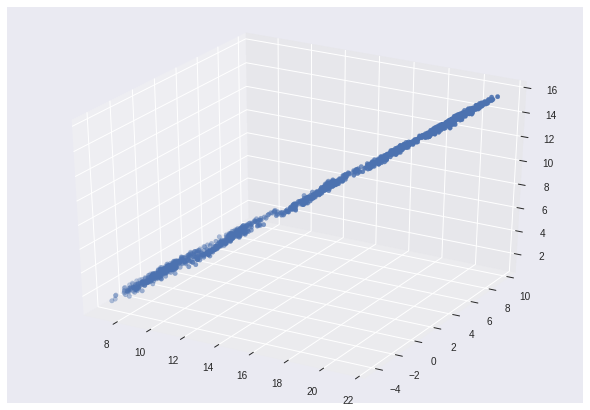

In [13]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(X1,X2,y)
plt.show()

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [0]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

In [16]:
Coef=reg.coef_
print(Coef)

[0.57686378 0.41935557]


In [17]:
R2=r2_score(y_test,y_pred)
print(R2)

0.9996691356848901


In [18]:
MSE=mean_squared_error(y_test,y_pred)
print(MSE)

0.005521869809461474


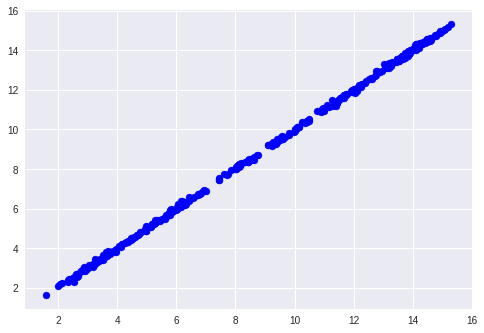

In [19]:
plt.scatter(y_pred,y_test,color='blue')
plt.show()

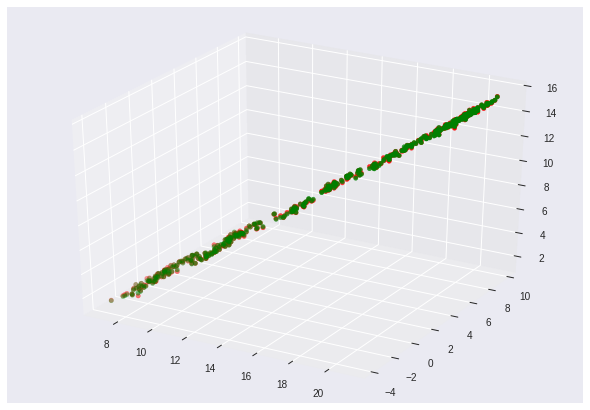

In [20]:
fig2=plt.figure()
ax2=Axes3D(fig2)
ax2.scatter(X_test['LandMaxTemperature'],X_test['LandMinTemperature'],y_test,color='red')
ax2.scatter(X_test['LandMaxTemperature'],X_test['LandMinTemperature'],y_pred,color='green')
plt.show()